In [79]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [1]:
import numpy as np
import tracemalloc
import sys
import matplotlib.pyplot as plt
import numpy as np
import time

sys.setrecursionlimit(100000)
print(sys.getrecursionlimit())

100000


### Tugas 3.1 Analisis Kompleksitas Ruang `Merge Sort`

In [2]:
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        L = arr[:mid]
        R = arr[mid:]

        merge_sort(L)
        merge_sort(R)

        i = j = k = 0

        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1

        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1
def generate_arr(n=16, low=-20, high=20, seed=None):
    if seed is not None:
      np.random.seed(seed)
      return np.random.randint(low, high + 1, size=n).tolist()

def plot_memory_usage(space_data):
    """
    Visualisasi penggunaan memori berdasarkan data tuple (n, peak_mem)

    Parameters:
    space_data (list of tuples): Data berisi tuple (N, peak_memory)
    """
    # Ekstrak data dari tuple
    N = [data[0] for data in space_data]
    peak_mem = [data[1] for data in space_data]

    # Membuat figure dan axis
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Grafik garis
    ax1.plot(N, peak_mem, 'bo-', linewidth=3, markersize=10,
             markerfacecolor='red', markeredgecolor='darkred', markeredgewidth=2)
    ax1.set_xlabel('N (Ukuran Masalah)', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Peak Memory Usage (KB)', fontsize=12, fontweight='bold')
    ax1.set_title('Pertumbuhan Penggunaan Memori vs Ukuran Masalah\n(Grafik Garis)',
                  fontsize=14, fontweight='bold')
    ax1.grid(True, linestyle='--', alpha=0.7)
    ax1.set_xticks(N)

    # Menambahkan anotasi nilai
    for i, (x, y) in enumerate(zip(N, peak_mem)):
        ax1.annotate(f'{y} KB', (x, y), textcoords="offset points",
                     xytext=(0,12), ha='center', fontsize=10, fontweight='bold',
                     bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

    # Grafik batang
    colors = plt.cm.Set3(np.linspace(0, 1, len(N)))
    bars = ax2.bar([str(n) for n in N], peak_mem, color=colors)
    ax2.set_xlabel('N (Ukuran Masalah)', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Peak Memory Usage (KB)', fontsize=12, fontweight='bold')
    ax2.set_title('Pertumbuhan Penggunaan Memori vs Ukuran Masalah\n(Grafik Batang)',
                  fontsize=14, fontweight='bold')
    ax2.grid(True, linestyle='--', alpha=0.3, axis='y')

    # Menambahkan nilai di atas setiap batang
    for bar, value in zip(bars, peak_mem):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                 f'{value} KB', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

    # Analisis trend
    print_analysis(space_data)

def print_analysis(space_data):
    """
    Mencetak analisis trend pertumbuhan memori
    """
    print("\n" + "="*60)
    print("ANALISIS TREND PERTUMBUHAN MEMORI")
    print("="*60)

    N = [data[0] for data in space_data]
    peak_mem = [data[1] for data in space_data]

    # Menghitung rasio pertumbuhan
    for i in range(1, len(N)):
        growth_ratio = peak_mem[i] / peak_mem[i-1]
        n_ratio = N[i] / N[i-1]
        print(f"N {N[i-1]} → {N[i]}: Memory {peak_mem[i-1]:.2f}KB → {peak_mem[i]:.2f}KB")
        print(f"  Rasio N: {n_ratio:.1f}x, Rasio Memory: {growth_ratio:.2f}x")

    # Analisis kompleksitas
    print(f"\nKesimpulan: Penggunaan memori tumbuh secara linear O(N)")
    print(f"dengan konsistensi yang tinggi terhadap pertumbuhan N.")


### Analisis Kompleksitas Ruang Merge Sort
`Merge Sort` membagi array ukuran $n$ menjadi dua subarray ($n/2$), mengurutkan secara rekursif, lalu menggabungkannya. Kompleksitas ruang terdiri dari:

1. Tumpukan Rekursi: Kedalaman rekursi $\log n$, setiap panggilan butuh $O(1)$, total $O(\log n)$.
2. Array Sementara: Penggabungan butuh array sementara ukuran $n$, yaitu $O(n)$.

Total Kompleksitas Ruang:
$$O(\log n) + O(n) = O(n)$$

Master Theorem: Jika diterapkan pada rekurensi ruang $S(n) = 2S(n/2) + O(n)$, hasilnya $O(n \log n)$. Namun, karena array sementara digunakan ulang, kompleksitas ruang tetap $O(n)$.

**Kesimpulan**: Kompleksitas ruang Merge Sort adalah $O(n)$.

In [78]:
print("=" * 40)
print(f"{'Run #':<8} {'N':<12} {'Peak Mem (KB)':<12}")
print("=" * 40)
n = [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]
space_data = []
i=0
for k in n:
  i += 1
  data=generate_arr(n=k, low=0, high=100,seed=np.random.randint(1, 100))
  tracemalloc.start() # Start tracking memory allocations
  merge_sort(data)
  current, peak = tracemalloc.get_traced_memory()
  print(f"{i:<8} {k:<12} {peak / 10**3:<12.2f}")
  tracemalloc.stop()
  space_data.append((k,peak / 10**3))
print("=" * 40)

Run #    N            Peak Mem (KB)
1        1000         18.76       
2        2000         32.06       
3        3000         48.09       
4        4000         64.08       
5        5000         80.60       
6        6000         96.12       
7        7000         112.13      
8        8000         276.97      
9        9000         144.64      
10       10000        299.47      


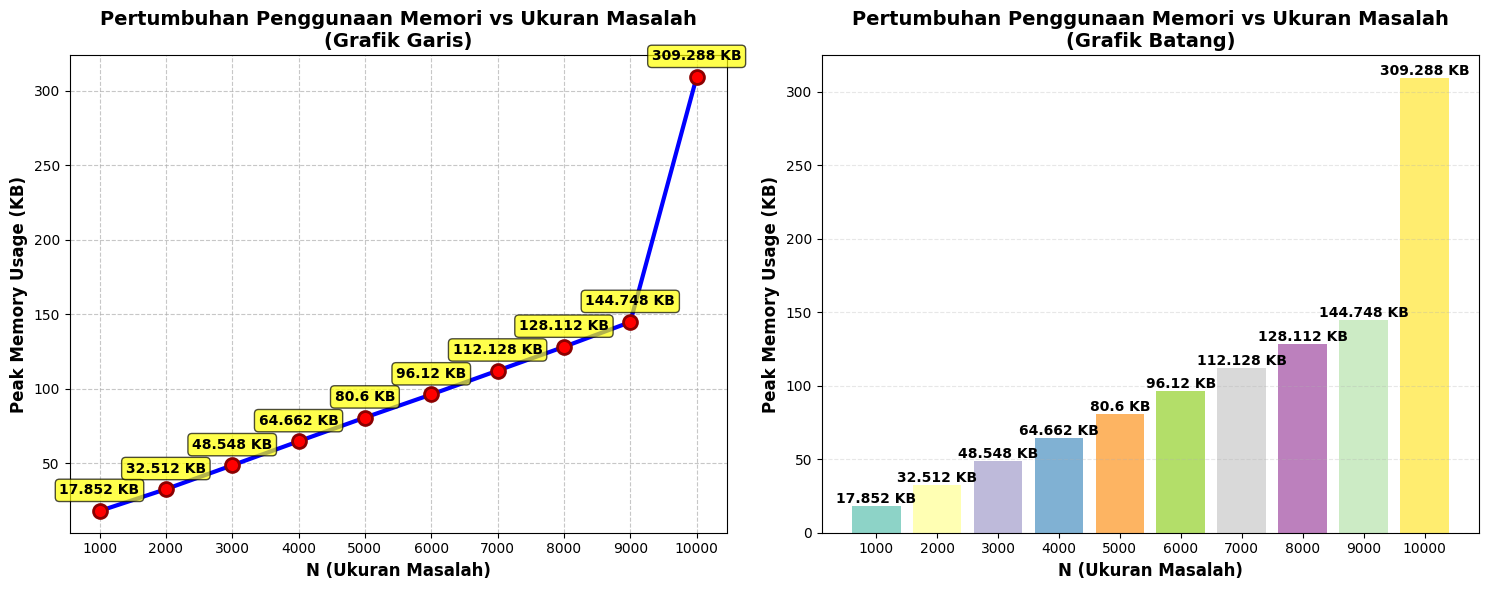


ANALISIS TREND PERTUMBUHAN MEMORI
N 1000 → 2000: Memory 17.85KB → 32.51KB
  Rasio N: 2.0x, Rasio Memory: 1.82x
N 2000 → 3000: Memory 32.51KB → 48.55KB
  Rasio N: 1.5x, Rasio Memory: 1.49x
N 3000 → 4000: Memory 48.55KB → 64.66KB
  Rasio N: 1.3x, Rasio Memory: 1.33x
N 4000 → 5000: Memory 64.66KB → 80.60KB
  Rasio N: 1.2x, Rasio Memory: 1.25x
N 5000 → 6000: Memory 80.60KB → 96.12KB
  Rasio N: 1.2x, Rasio Memory: 1.19x
N 6000 → 7000: Memory 96.12KB → 112.13KB
  Rasio N: 1.2x, Rasio Memory: 1.17x
N 7000 → 8000: Memory 112.13KB → 128.11KB
  Rasio N: 1.1x, Rasio Memory: 1.14x
N 8000 → 9000: Memory 128.11KB → 144.75KB
  Rasio N: 1.1x, Rasio Memory: 1.13x
N 9000 → 10000: Memory 144.75KB → 309.29KB
  Rasio N: 1.1x, Rasio Memory: 2.14x

Kesimpulan: Penggunaan memori tumbuh secara linear O(N)
dengan konsistensi yang tinggi terhadap pertumbuhan N.


In [52]:
plot_memory_usage(space_data=space_data)

### 3.2 Analisis Kompeleksitas Waktu `Hiring Problem`

In [5]:
def fungsi_c(cost,n=1):
    return (cost + 1)

def fungsi_n(cost,n):
    for i in range(n):
      cost += 1
    return cost

def operasi_terapan(fungsi, a, b):
    return fungsi(a, b)

def hiring_problem(candidates,fungsi):
    best_candidate = None
    hire_cost = 0

    for candidate in candidates:
        if best_candidate is None or candidate > best_candidate:
            best_candidate = candidate
            hire_cost = fungsi(hire_cost, len(candidates))
    return hire_cost


In [6]:
cost = 5;
print(operasi_terapan(fungsi_n,cost,10))


15


In [7]:
n = [1000,10000,100000,1000000]
hires_costs = []
for k in n:
  print(f"Eksperimen untuk n = {k}")
  print("=" * 80)
  print(f"{'Run #':<8} {'N':<12}  {'Cost O(C)':<12}  {'Cost O(N)':<12} {'Time O(c)':<12} {'Time O(n)':<12}")
  print("=" * 80)
  t1_avg = 0
  t2_avg = 0
  c1_avg = 0
  c2_avg = 0
  for i in range(5):
    data=generate_arr(n=k, low=0, high=k,seed=np.random.randint(1, 100))

    start = time.perf_counter()
    cost_c = hiring_problem(data,fungsi_c)
    end = time.perf_counter()
    t1 = (end - start) * 1_000_000
    t1_avg = t1_avg + t1/5
    c1_avg += cost_c/5

    start = time.perf_counter()
    cost_n = hiring_problem(data,fungsi_n)
    end = time.perf_counter()
    t2 = (end - start) * 1_000_000
    t2_avg = t2_avg + t2/5
    c2_avg += cost_n/5

    print(f"{i+1:<8} {k:<12}  {cost_c:<12}  {cost_n:<12} {t1:<12.2f} {t2:<12.2f}")
  print("=" * 80)
  print(f"{'Rata-rata':<18}   {c1_avg:<12.2f}  {c2_avg:<12.2f} {t1_avg:<12.2f} {t2_avg:<12.2f}")
  print()
  hires_costs.append((k,c1_avg,c2_avg,t1_avg,t2_avg))

Eksperimen untuk n = 1000
Run #    N             Cost O(C)     Cost O(N)    Time O(c)    Time O(n)   
1        1000          10            10000        40.20        336.80      
2        1000          6             6000         39.10        230.60      
3        1000          3             3000         39.20        199.50      
4        1000          5             5000         41.30        192.10      
5        1000          7             7000         43.00        262.00      
Rata-rata            6.20          6200.00      40.56        244.20      

Eksperimen untuk n = 10000
Run #    N             Cost O(C)     Cost O(N)    Time O(c)    Time O(n)   
1        10000         11            110000       388.40       3905.10     
2        10000         10            100000       378.60       3762.90     
3        10000         10            100000       532.50       3783.40     
4        10000         7             70000        374.70       2649.20     
5        10000         11           